Interpolated polynomials to predict Forced Expiratory Volume (FEV) based on height data

In [1]:
height = [134, 138, 142, 146, 150, 154, 158, 162, 166, 170, 174, 178]
fev = [1.7, 1.9, 2., 2.1, 2.2, 2.5, 2.7, 3., 3.1, 3.4, 3.8, 3.9]

print("height    fev")

for i in height:
        print(i, "    ", fev[height.index(i)])

height    fev
134      1.7
138      1.9
142      2.0
146      2.1
150      2.2
154      2.5
158      2.7
162      3.0
166      3.1
170      3.4
174      3.8
178      3.9


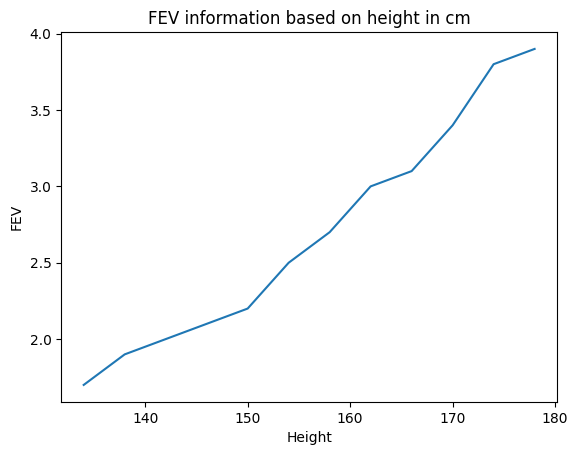

In [2]:
import matplotlib.pyplot as plt

x = height
y = fev

plt.plot(x,y)
plt.title("FEV information based on height in cm")
plt.ylabel("FEV")
plt.xlabel("Height")
plt.show()

In [3]:
def compute_int_coeff(n ,x, y):
        coeff = []
        for i in range (0, n+1):
                numerator = y[i]
                denominator = 1
                for j in range (0,n+1):
                        if (i != j):
                                denominator = denominator * (x[i] - x[j])
                coeff.append(numerator/denominator)
        return(coeff)

def eval_int_polynomial(n, x, x_eval, coeff):
        my_sum = 0
        for i in range(0,n+1):
                product = 1
                for j in range(0,n+1):
                        if (i != j):
                                product = product * (x_eval - x[j])
                yi_times_Li = product * coeff[i]
                my_sum += yi_times_Li
        return(my_sum)

In [4]:
x = height
y = fev
n = len(height) - 1
coeff = compute_int_coeff(n,x,y)

x_eval = [134, 178]
n_eval = 2

for i in range(0,n_eval):
        xx = x_eval[i]
        poly_at_x = eval_int_polynomial(n,x,xx,coeff)
        print(f"The polynomial evaluated at x={xx} is {poly_at_x}")
        

The polynomial evaluated at x=134 is 1.7
The polynomial evaluated at x=178 is 3.9


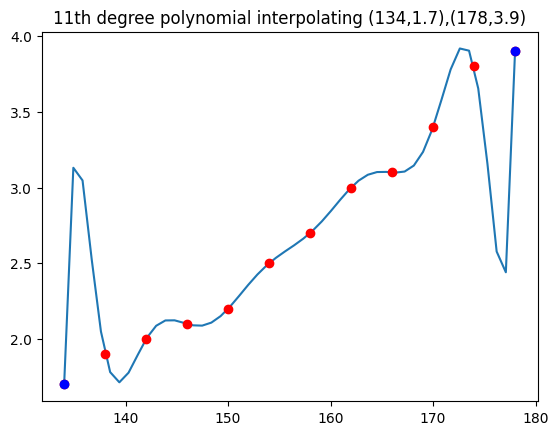

In [5]:
import numpy as np

x_plt = np.linspace(134,178)
y_plt = []

for i in range(0,len(x_plt)):
        xx = x_plt[i]
        poly_at_x = eval_int_polynomial(n,x,xx,coeff)
        y_plt.append(poly_at_x)

plt.plot(x_plt, y_plt)
plt.title("11th degree polynomial interpolating (134,1.7),(178,3.9)")
plt.plot(x,y,"ro")
xs = [134,178]; ys=[1.7,3.9]
plt.plot(xs,ys,"bo")

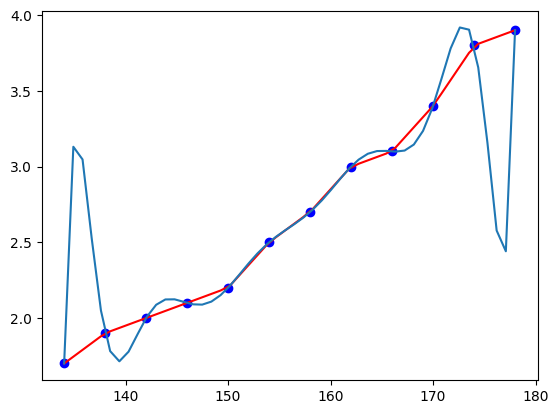

In [6]:
f_plt = np.interp(x_plt,x,y)
plt.plot(x,y,'ob')
plt.plot(x_plt,f_plt,'r')
plt.plot(x_plt,y_plt)